### Libraries

In [21]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from lib import analysis, enrich
from scipy import stats
from scipy import io

### Import data

In [25]:
user_col = 'user'
item_col = 'item'
predict_col = 'rating'
location = 'data/'

In [30]:
fairbook_ratings = pd.read_csv(
    location + 'fairbook/fairbook_events.csv', header=0,
)

In [23]:
mat = io.loadmat(location+"epinion/epinion_events.mat")
mat_df = pd.DataFrame(mat['rating_with_timestamp'])
mat_df.columns = [user_col, item_col, '.', predict_col, '..', '...']
epinion_ratings = mat_df[[user_col,item_col,predict_col]].drop_duplicates(subset = [user_col,item_col], keep='last')

In [26]:
ml1m_ratings = pd.read_csv(
    location+'movielens_1m/ml1m_events.dat', header=None, sep="::", engine="python"
).drop(3, axis=1)
ml1m_ratings.columns = [user_col, item_col, predict_col]

### Analyze data

In [34]:
def do_analysis(ratings):
    # analysis.users_and_items(ratings, user_col, item_col)
    user_dist, num_users = analysis.user_distribution(ratings, user_col, item_col, verbose=False)
    item_dist, num_items = analysis.item_distribution(ratings, user_col, item_col, verbose=False)
    item_rating_dist = analysis.item_rating(ratings,item_col, predict_col, verbose=False)
    
    df_item_dist = pd.DataFrame(item_dist)
    df_item_dist.columns = ['count']
    full_item_dist = pd.merge(df_item_dist, item_rating_dist, left_index=True, right_index=True)

    font = {'size'   : 15}
    matplotlib.rc('font', **font)
    
    # plot: item rating vs popularity
    
    x = full_item_dist['count'].values
    y = full_item_dist.rating.values
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    line = slope * np.array(x) + intercept
    # Calculate the point density
    # print('hi')
    # xy = np.vstack([x,y])
    # z = stats.gaussian_kde(xy)(xy)
    print('hi')
    fig, axs = plt.subplots(1, 1)
    axs.plot(x, line)
    axs.set_xlabel("Item popularity",fontsize=20)
    axs.set_ylabel("Item average rating",fontsize=20)
    axs.set_title('Correlation: ' + str(round(r_value,2)),fontsize=20)
    # Sort the points by density, so that the densest points are plotted last
    # idx = z.argsort()
    # x, y, z = x[idx], y[idx], z[idx]
    # axs.scatter(x, y, c=z, s=50)
    axs.scatter(x, y, s=50)

    uc, ic = enrich.calculate_userKNN_characteristics(ratings, user_dist, item_dist, user_col, item_col, predict_col,  df_item_dist, divide_by = 'pop_item_fraq')

    # plot: profile size vs score_pop
    
    x = uc.dropna(axis=0)["user_hist"].values
    y = uc.dropna(axis=0)["score_vs_pop"].values
    
        
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    line = slope * np.array(x) + intercept
    # # Calculate the point density
    # xy = np.vstack([x,y])
    # z = stats.gaussian_kde(xy)(xy)
    
    fig, axs = plt.subplots(1, 1)
    axs.plot(x, line)
    axs.set_xlabel("User profile size",fontsize=20)
    axs.set_ylabel("User liking for popular items",fontsize=20)
    axs.set_title('Correlation: ' + str(round(r_value,2)),fontsize=20)
    # Sort the points by density, so that the densest points are plotted last
    # idx = z.argsort()
    # x, y, z = x[idx], y[idx], z[idx]
    # axs.scatter(x, y, c=z, s=50)
    axs.scatter(x, y, s=50)

Mean items per user: 41.2
Min items per user: 1
Max items per user: 5337


Mean users per item: 3.1
Min users per item: 1
Max users per item: 1742


Mean rating per item: 4.0
Min rating per item: 1.0
Max rating per item: 5.0




/export/scratch2/home/savvina/new_environment/conda/envs/elliot_env_dirk/lib/python3.8/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/export/scratch2/home/savvina/new_environment/conda/envs/elliot_env_dirk/lib/python3.8/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/export/scratch2/home/savvina/new_environment/conda/envs/elliot_env_dirk/lib/python3.8/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/export/scratch2/home/savvina/new_environment/conda/envs/elliot_env_dirk/lib/python3.8/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input ar

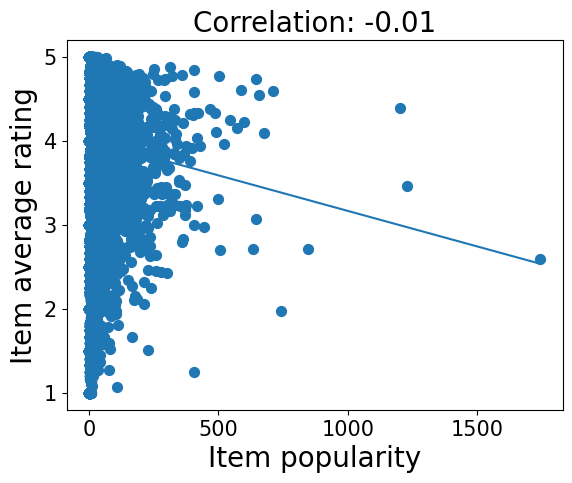

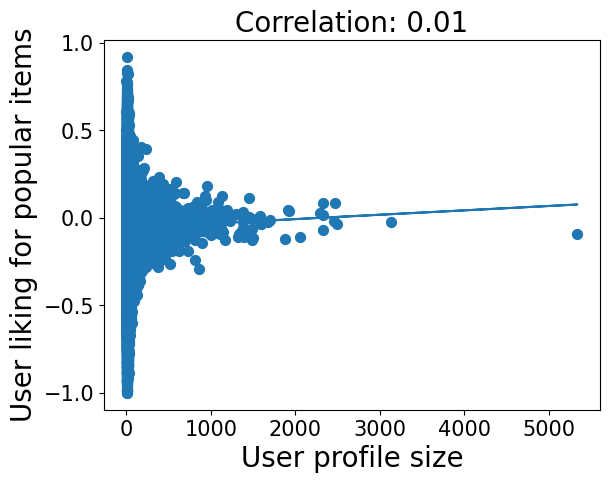

In [36]:
do_analysis(epinion_ratings)